In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gumbel_r  # right-skewed dist for ISIs

In [2]:
# current values
TOTAL_DURATION = 450.
LEAD_IN_DURATION = 6.
EQUATION_DURATION = 2.
ISI1 = 0.5
COMPARISON_DURATION = 5.
ISI2 = 0.5
FEEDBACK_DURATION = 2.
ITI = 0.5
END_SCREEN_DURATION = 6.

duration_left = TOTAL_DURATION - (LEAD_IN_DURATION + END_SCREEN_DURATION)

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


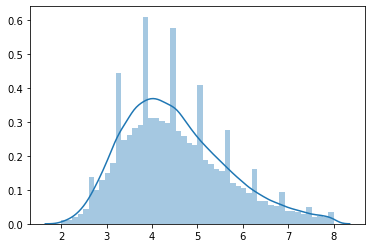

In [3]:
# Let's start with plotting a Gumbel R distribution
mu = 4.
raw_durations = gumbel_r.rvs(size=100000, loc=mu, scale=1)
possible_durations = np.round(raw_durations, 1)
# crop to 2-8s
possible_durations = possible_durations[possible_durations >= 2]
possible_durations = possible_durations[possible_durations <= 8]

fig, ax = plt.subplots()
sns.distplot(possible_durations, ax=ax)
fig.show()

In [4]:
# parameters to test
ranges = {
    'equation': (1, 3),
    'isi1': (),
    'comparison': (1, 3),
    'isi2': (),
    'feedback': 0.5,
    'iti': (),
}

n_trials = 24

In [5]:
# build distribution of total times to make sure
# our requested duration is somewhere near the average
total_trial_durations = []
for i in range(10000):
    durations = {}
    for stage, range_ in ranges.items():
        # using uniform distributions...
        if stage in ['equation', 'comparison']:
            durations[stage] = np.random.randint(range_[0]*10, (range_[1]*10)+1, size=n_trials) / 10
        elif stage in ['isi1', 'isi2', 'iti']:
            durations[stage] = np.random.choice(possible_durations, size=n_trials, replace=True)
        else:
            durations[stage] = np.array([range_] * n_trials)
    dur_arr = np.stack(list(durations.values()))
    total_trial_duration = dur_arr.sum()
    total_trial_durations.append(total_trial_duration)

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


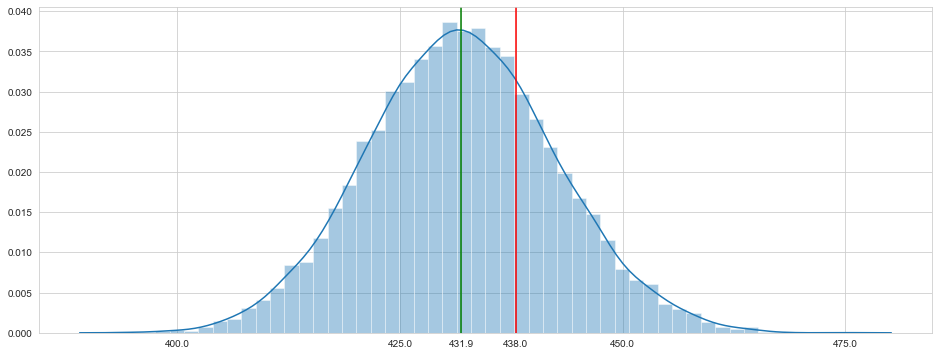

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(16, 6))
sns.distplot(total_trial_durations, ax=ax)
ax.axvline(np.mean(total_trial_durations), color='green')
ax.axvline(duration_left, color='red')
ax.set_xticks([400, 425, np.mean(total_trial_durations), duration_left, 450, 475])
fig.show()

In [7]:
c = 0
total_trial_duration = duration_left + 1
while (((duration_left - total_trial_duration) < 0) or
       ((duration_left - total_trial_duration) > 1)):
    durations = {}
    for stage, range_ in ranges.items():
        # using uniform distributions...
        if stage in ['equation', 'comparison']:
            durations[stage] = np.random.randint(range_[0]*10, (range_[1]*10)+1, size=n_trials) / 10
        elif stage in ['isi1', 'isi2', 'iti']:
            durations[stage] = np.random.choice(possible_durations, size=n_trials, replace=True)
        else:
            durations[stage] = np.array([range_] * n_trials)
    dur_arr = np.stack(list(durations.values()))
    total_trial_duration = dur_arr.sum()
    c += 1
    if c > 1000:
        print('No solution found.')
        break
print('{} / {}'.format(dur_arr.sum(), duration_left))

437.20000000000005 / 438.0


In [8]:
durations

{'comparison': array([2.2, 2. , 1. , 2.7, 1.8, 2.4, 1.5, 1.6, 1.6, 1.7, 2.7, 1.2, 2. ,
        3. , 1.6, 2.7, 2.6, 1.9, 2.4, 1. , 1.8, 2. , 1.6, 3. ]),
 'equation': array([3. , 2.5, 2.3, 1.5, 3. , 1.7, 2.9, 1.8, 1. , 2.2, 2.6, 1.3, 1.4,
        2.4, 1.4, 1.9, 2.9, 1.1, 1.6, 2.7, 2.5, 1.1, 2.9, 1.1]),
 'feedback': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'isi1': array([2.5, 5.4, 3.5, 6.3, 3.2, 4.3, 3.4, 5.6, 4.9, 4.5, 3.4, 3.7, 5.2,
        4.5, 4.2, 5.9, 3.1, 7.1, 4.5, 4.4, 3.2, 3.9, 6.3, 2.8]),
 'isi2': array([5. , 5.1, 5.4, 5. , 3. , 4.3, 2.9, 4.4, 4.1, 4.8, 5. , 4.6, 3.1,
        5.6, 4.9, 6.2, 3.1, 7.4, 6.2, 5. , 3.2, 3.1, 4.7, 3.9]),
 'iti': array([6.4, 4.2, 3.9, 5.5, 3.7, 4.2, 6.3, 3.2, 5.2, 5.8, 4.6, 4.8, 5.1,
        4.8, 7.4, 5.4, 4.2, 3. , 3.6, 5. , 4.1, 3.7, 4.1, 4.4])}

In [9]:
# Make events dataframe
onset_counter = LEAD_IN_DURATION
equation_onsets, comparison_onsets, feedback_onsets = [], [], []

for i_trial in range(len(durations['comparison'])):
    equation_onsets.append(onset_counter)
    onset_counter += (durations['equation'][i_trial] + durations['isi1'][i_trial])
    comparison_onsets.append(onset_counter)
    onset_counter += (durations['comparison'][i_trial] + durations['isi2'][i_trial])
    feedback_onsets.append(onset_counter)
    onset_counter += (durations['feedback'][i_trial] + durations['iti'][i_trial])

In [10]:
import pandas as pd
equation_df = pd.DataFrame(columns=['onset', 'duration', 'trial_type'])
equation_df['onset'] = equation_onsets
equation_df['duration'] = durations['equation']
equation_df['trial_type'] = 'equation'

comparison_df = pd.DataFrame(columns=['onset', 'duration', 'trial_type'])
comparison_df['onset'] = comparison_onsets
comparison_df['duration'] = durations['comparison']
comparison_df['trial_type'] = 'comparison'

feedback_df = pd.DataFrame(columns=['onset', 'duration', 'trial_type'])
feedback_df['onset'] = feedback_onsets
feedback_df['duration'] = durations['feedback']
feedback_df['trial_type'] = 'feedback'

df = pd.concat((equation_df, comparison_df, feedback_df), axis=0)
df = df.sort_values(by='onset')
df.reset_index(drop=True, inplace=True)
df.head()

,onset,duration,trial_type
0,6.0,3.0,equation
1,11.5,2.2,comparison
2,18.7,0.5,feedback
3,25.6,2.5,equation
4,33.5,2.0,comparison


/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: 

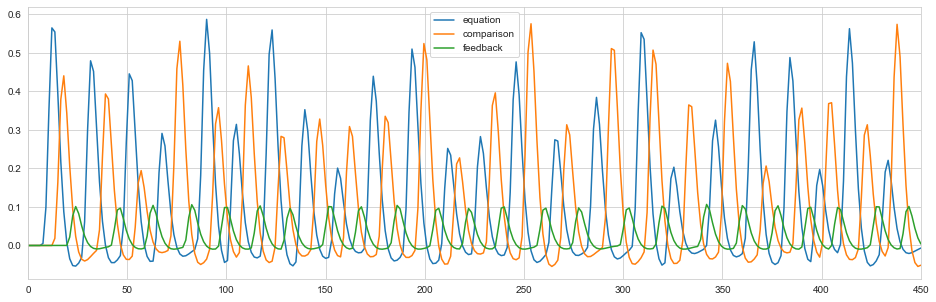

In [11]:
# Plot predicted time courses
from nistats.design_matrix import make_first_level_design_matrix
vol_times = np.linspace(0, 450, (450/1.5) + 1)
design_matrix = make_first_level_design_matrix(
    frame_times=vol_times,
    events=df, drift_model=None,
    hrf_model='spm')

fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(vol_times, design_matrix['equation'], label='equation')
ax.plot(vol_times, design_matrix['comparison'], label='comparison')
ax.plot(vol_times, design_matrix['feedback'], label='feedback')
ax.set_xlim(0, 450)
ax.legend()
fig.show()

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


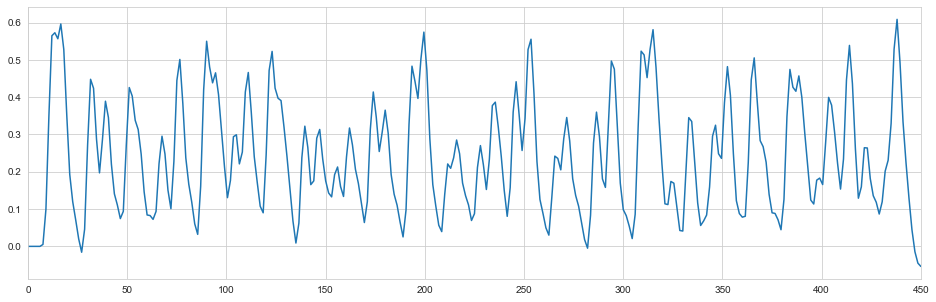

In [12]:
fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(vol_times, design_matrix['equation'] + design_matrix['comparison'] + design_matrix['feedback'])
ax.set_xlim(0, 450)
fig.show()